In [2]:
#Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [4]:
#Load dataset
data = pd.read_csv(r"C:\Breast Cancer Risk Detection\Breast Cancer METABRIC.csv")
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [5]:
#data backup
df = data.copy ()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [4]:
#Duplicate
df [df.duplicated()]

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status


In [5]:
#Outliers
df.describe()


,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


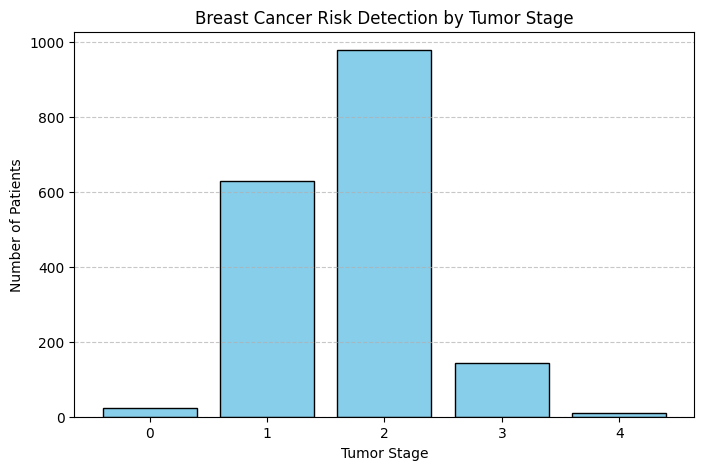

In [6]:
# Count patients by tumor stage (dropping missing values)
stage_counts = df['Tumor Stage'].dropna().astype(int).value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(stage_counts.index.astype(str), stage_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.title('Breast Cancer Risk Detection by Tumor Stage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

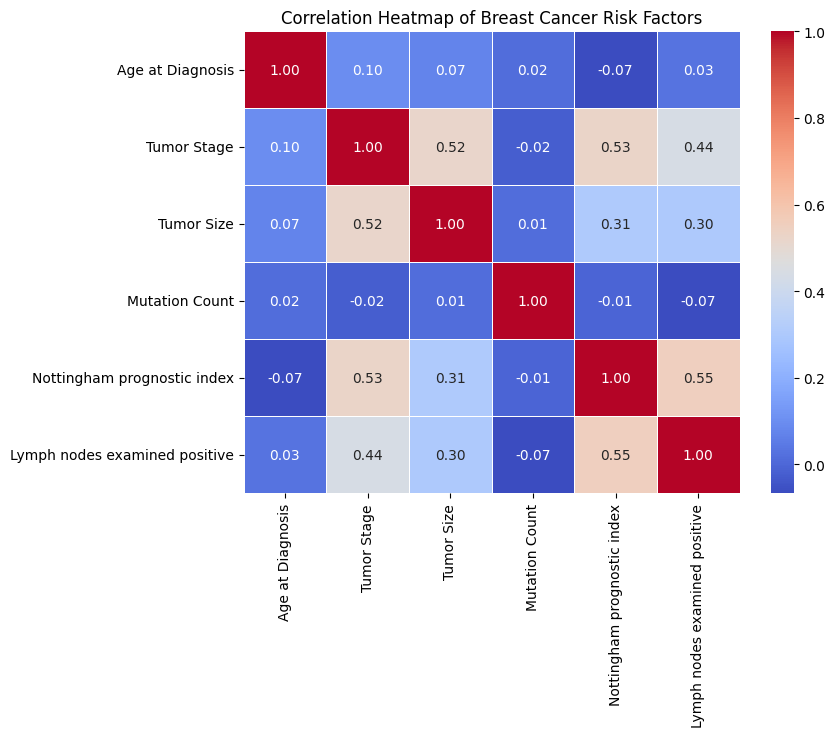

In [7]:
# Select numerical columns related to risk
risk_cols = ['Age at Diagnosis', 
             'Tumor Stage', 
             'Tumor Size', 
             'Mutation Count', 
             'Nottingham prognostic index', 
             'Lymph nodes examined positive']

# Drop rows with missing values in these columns
risk_data = df[risk_cols].dropna()
# Compute correlation matrix
corr_matrix = risk_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Risk Factors')
plt.show()

In [9]:
# Create binary target
df['target'] = df['Overall Survival Status'].map({'Living': 0, 'Deceased': 1})
df = df.dropna(subset=['target'])  # remove rows with missing target

In [10]:
# Encode categorical features
X = df.drop(columns='target')
X = pd.get_dummies(X, drop_first=True)
y = df['target']

In [11]:
# Impute missing values with mean (for numeric) / most frequent (for categorical dummy variables)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [12]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

In [13]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [15]:
#Predict survival status for the test set
y_pred = model.predict(X_test_scaled)

In [16]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
# Show first 10 predictions and probabilities
for i in range(10):
    print(f"Predicted Class: {y_pred[i]}, Probability of Deceased: {y_pred_proba[i]:.2f}")

Predicted Class: 1, Probability of Deceased: 1.00
Predicted Class: 1, Probability of Deceased: 1.00
Predicted Class: 0, Probability of Deceased: 0.01
Predicted Class: 1, Probability of Deceased: 0.99
Predicted Class: 1, Probability of Deceased: 1.00
Predicted Class: 1, Probability of Deceased: 1.00
Predicted Class: 1, Probability of Deceased: 1.00
Predicted Class: 1, Probability of Deceased: 0.96
Predicted Class: 1, Probability of Deceased: 0.99
Predicted Class: 0, Probability of Deceased: 0.01


In [17]:
#Prediction
y_predict = model.predict(X_test_scaled)

# Create DataFrame with readable labels
df_predict = pd.DataFrame({
    'Actual': y_test.map({0: 'Living', 1: 'Deceased'}),
    'Predicted': pd.Series(y_predict).map({0: 'Living', 1: 'Deceased'})
})

In [18]:
# Show first 10 predictions
df_predict.head(10)

,Actual,Predicted
0,NaN,Deceased
1,NaN,Deceased
2,NaN,Living
3,NaN,Deceased
4,NaN,Deceased
5,NaN,Deceased
6,NaN,Deceased
7,NaN,Deceased
8,NaN,Deceased
9,NaN,Living


In [19]:
# Evaluate
accuracy = metrics.accuracy_score(y_test, y_predict)
conf = metrics.confusion_matrix(y_test, y_predict)
report = metrics.classification_report(y_test, y_predict)

In [20]:
# Print metrics
print(f'Accuracy of the model is: {accuracy:.2f}')
print("The Confusion Matrix:\n", conf)
print("\nClassification Report:\n", report)

Accuracy of the model is: 1.00
The Confusion Matrix:
 [[164   0]
 [  0 233]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       233

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



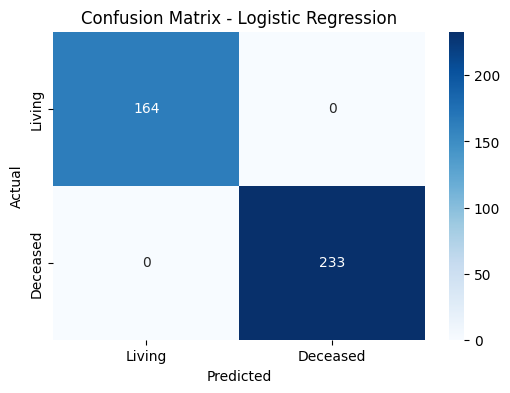

In [21]:
# Optional: plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Living', 'Deceased'],
            yticklabels=['Living', 'Deceased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [25]:
#Patient ID: Unique identifier for each patient.
# Preview patient IDs
print("Sample Patient IDs:")
print(df['Patient ID'].head())

# Check number of unique IDs
unique_ids = df['Patient ID'].nunique()
total_rows = len(df)
print(f"\nNumber of unique Patient IDs: {unique_ids}")
print(f"Total number of rows: {total_rows}")

# Check for duplicate IDs
duplicate_ids = df[df['Patient ID'].duplicated(keep=False)]
if not duplicate_ids.empty:
    print("\n Warning: Duplicate Patient IDs found!")
    print(duplicate_ids)
else:
    print("\n All Patient IDs are unique.")

Sample Patient IDs:
0    MB-0000
1    MB-0002
2    MB-0005
3    MB-0006
4    MB-0008
Name: Patient ID, dtype: object

Number of unique Patient IDs: 2509
Total number of rows: 2509

 All Patient IDs are unique.


In [22]:
#Age at Diagnosis: Age of the patient when diagnosed with cancer.
# Optional: actual vs predicted table
df_predict = pd.DataFrame({
    'Actual': y_test.map({0: 'Living', 1: 'Deceased'}),
    'Predicted': pd.Series(y_predict).map({0: 'Living', 1: 'Deceased'})
})
print(df_predict.head())

  Actual Predicted
0    NaN  Deceased
1    NaN  Deceased
2    NaN    Living
3    NaN  Deceased
4    NaN  Deceased


0     75.65
1     43.19
2     48.87
3     47.68
4     76.97
5     78.77
6     56.45
7     70.00
8     89.08
10    86.41
Name: Age at Diagnosis, dtype: float64

Statistics:
count    1981.000000
mean       61.086986
std        12.949710
min        21.930000
25%        51.420000
50%        61.810000
75%        70.600000
max        96.290000
Name: Age at Diagnosis, dtype: float64


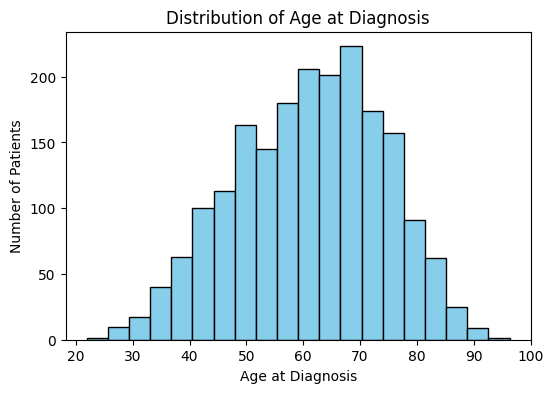

In [23]:
# Display first 10 patient ages at diagnosis
print(df['Age at Diagnosis'].head(10))

# Basic statistics about Age at Diagnosis
print("\nStatistics:")
print(df['Age at Diagnosis'].describe())
plt.figure(figsize=(6,4))
plt.hist(df['Age at Diagnosis'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Distribution of Age at Diagnosis')
plt.show()

Sample data:
0           Mastectomy
1    Breast Conserving
2           Mastectomy
3           Mastectomy
4           Mastectomy
Name: Type of Breast Surgery, dtype: object

Surgery type counts:
Type of Breast Surgery
Mastectomy           1170
Breast Conserving     785
NaN                    26
Name: count, dtype: int64


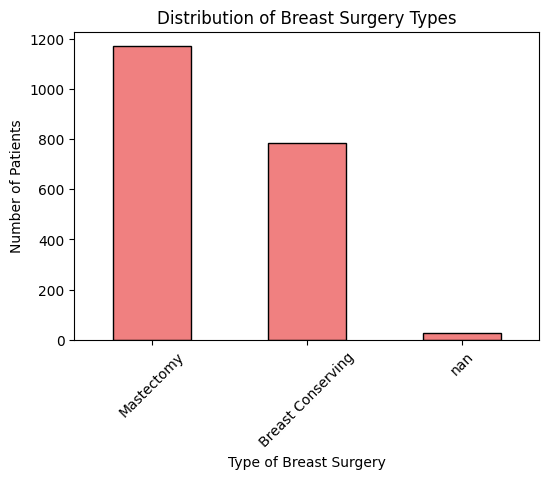

In [24]:
#Type of Breast Surgery: The type of surgery performed on the breast, such as mastectomy or lumpectomy.
# View first few entries of Type of Breast Surgery
print("Sample data:")
print(df['Type of Breast Surgery'].head())

# Count how many patients had each type of surgery
surgery_counts = df['Type of Breast Surgery'].value_counts(dropna=False)
print("\nSurgery type counts:")
print(surgery_counts)

# Plot distribution of surgery types
plt.figure(figsize=(6,4))
surgery_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Number of Patients')
plt.title('Distribution of Breast Surgery Types')
plt.show()

Sample Surgery Types:
0           Mastectomy
1    Breast Conserving
2           Mastectomy
3           Mastectomy
4           Mastectomy
Name: Type of Breast Surgery, dtype: object

Surgery type counts:
Type of Breast Surgery
Mastectomy           1170
Breast Conserving     785
NaN                    26
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\3018993770.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type of Breast Surgery', palette='pastel')


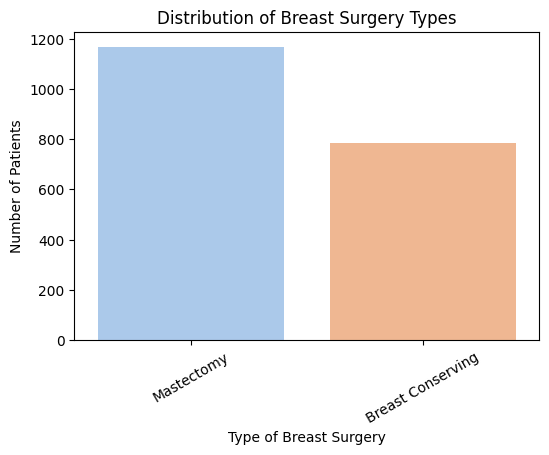

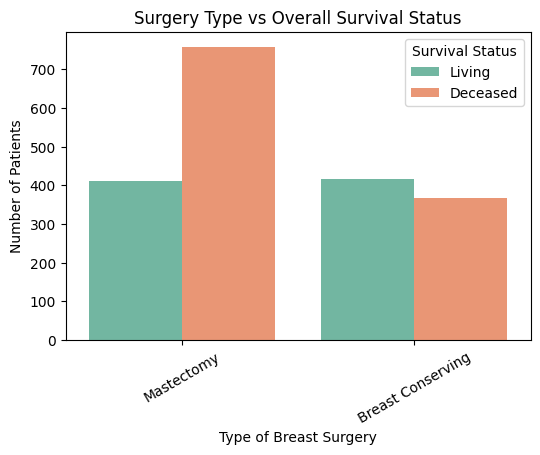

In [25]:
#Cancer Type Detailed: More specific classification of the cancer type
# Display first few rows of surgery types
print("Sample Surgery Types:")
print(df['Type of Breast Surgery'].head())
# Count occurrences of each surgery type
surgery_counts = df['Type of Breast Surgery'].value_counts(dropna=False)
print("\nSurgery type counts:")
print(surgery_counts)

# Plot distribution of surgery types
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type of Breast Surgery', palette='pastel')
plt.xticks(rotation=30)
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Number of Patients')
plt.title('Distribution of Breast Surgery Types')
plt.show()

# Optional: Compare surgery type with survival outcome
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type of Breast Surgery', hue='Overall Survival Status', palette='Set2')
plt.xticks(rotation=30)
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Number of Patients')
plt.title('Surgery Type vs Overall Survival Status')
plt.legend(title='Survival Status')
plt.show()


Sample Cancer Type Detailed values:
0             Breast Invasive Ductal Carcinoma
1             Breast Invasive Ductal Carcinoma
2             Breast Invasive Ductal Carcinoma
3    Breast Mixed Ductal and Lobular Carcinoma
4    Breast Mixed Ductal and Lobular Carcinoma
Name: Cancer Type Detailed, dtype: object

Cancer Type Detailed Counts:
Cancer Type Detailed
Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\1448614194.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


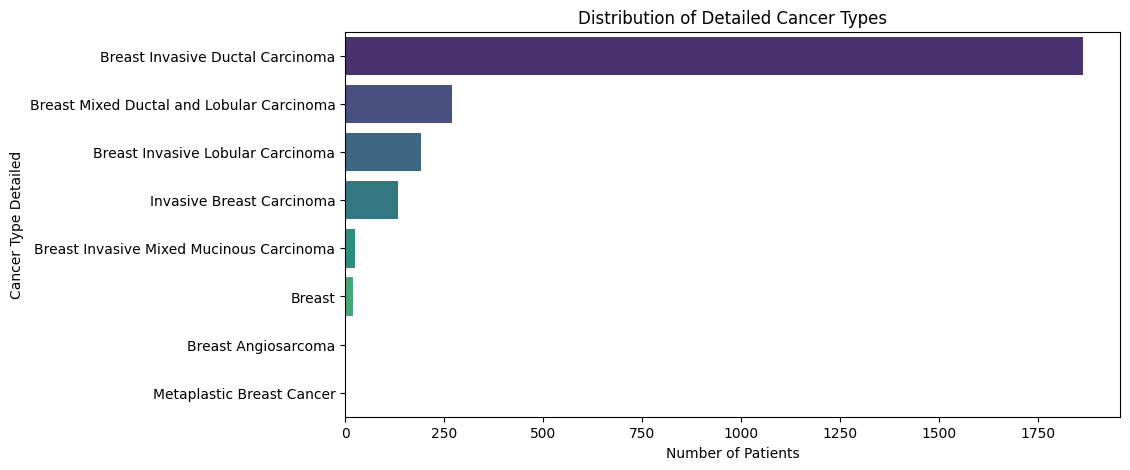

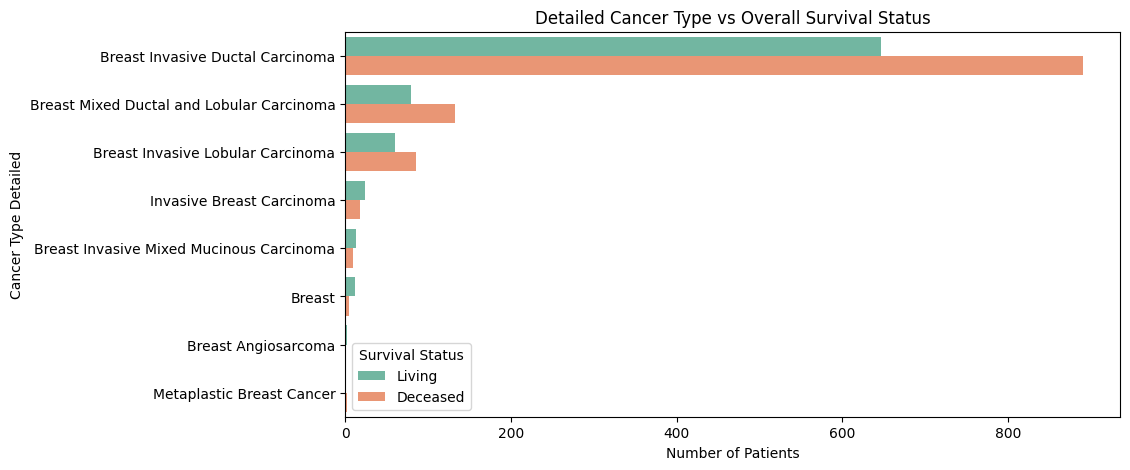

In [24]:
#Cellularity: The degree of cellularity of the tumor, often used in pathology to describe the proportion of cells versus other components in a tissue sample.
# Display first few rows of Cancer Type Detailed
print("Sample Cancer Type Detailed values:")
print(df['Cancer Type Detailed'].head())

# Count each cancer type detailed category
cancer_detailed_counts = df['Cancer Type Detailed'].value_counts(dropna=False)
print("\nCancer Type Detailed Counts:")
print(cancer_detailed_counts)

# Plot distribution of detailed cancer types
plt.figure(figsize=(10,5))
sns.countplot(
    data=df, 
    y='Cancer Type Detailed', 
    order=cancer_detailed_counts.index,
    palette='viridis'
)
plt.xlabel('Number of Patients')
plt.ylabel('Cancer Type Detailed')
plt.title('Distribution of Detailed Cancer Types')
plt.show()

# Optional: Compare detailed cancer type with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(
        data=df, 
        y='Cancer Type Detailed', 
        hue='Overall Survival Status', 
        order=cancer_detailed_counts.index,
        palette='Set2'
    )
    plt.xlabel('Number of Patients')
    plt.ylabel('Cancer Type Detailed')
    plt.title('Detailed Cancer Type vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Chemotherapy values:
0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Chemotherapy, dtype: object

Chemotherapy Counts:
Chemotherapy
No     1568
Yes     412
NaN       1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\3473295342.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Chemotherapy', order=chemo_counts.index, palette='pastel')


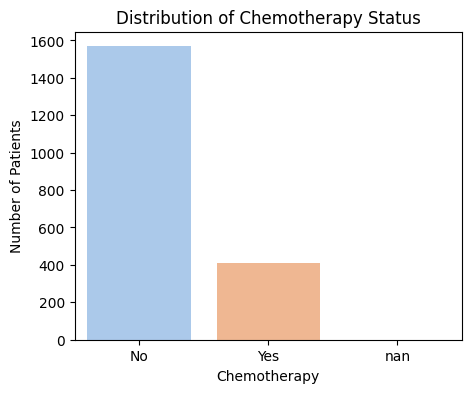

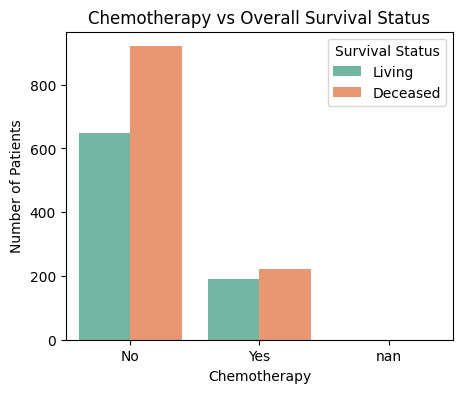

In [28]:
#Chemotherapy: Indicates whether the patient received chemotherapy (Yes/No).
# Display first few entries for Chemotherapy
print("Sample Chemotherapy values:")
print(df['Chemotherapy'].head())

# Count how many patients received chemotherapy vs not
chemo_counts = df['Chemotherapy'].value_counts(dropna=False)
print("\nChemotherapy Counts:")
print(chemo_counts)

# Plot distribution of chemotherapy status
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Chemotherapy', order=chemo_counts.index, palette='pastel')
plt.xlabel('Chemotherapy')
plt.ylabel('Number of Patients')
plt.title('Distribution of Chemotherapy Status')
plt.show()
# Optional: Compare chemotherapy vs survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df, 
        x='Chemotherapy', 
        hue='Overall Survival Status', 
        order=chemo_counts.index, 
        palette='Set2'
    )
    plt.xlabel('Chemotherapy')
    plt.ylabel('Number of Patients')
    plt.title('Chemotherapy vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Chemotherapy values:
0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Chemotherapy, dtype: object

Chemotherapy Counts:
Chemotherapy
No     1568
Yes     412
NaN       1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\3197501820.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Chemotherapy', order=chemo_counts.index, palette='pastel')


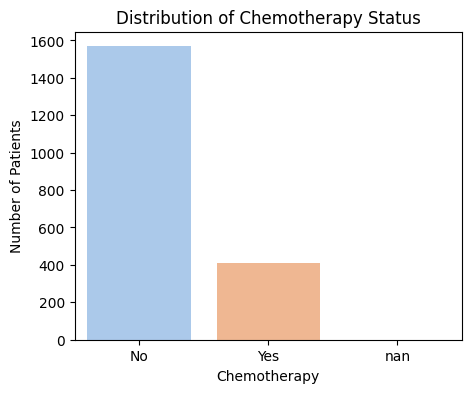

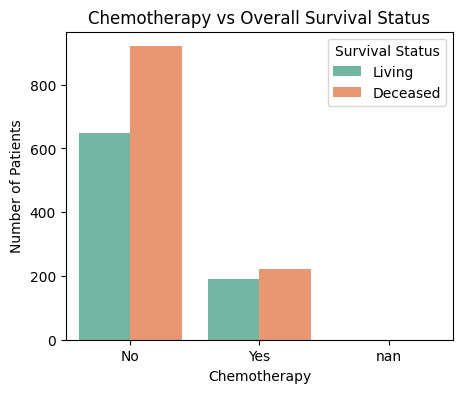

In [29]:
#Pam50 + Claudin-low subtype: Subtypes based on gene expression profiling, including Pam50 and Claudin-low classifications.
# Display first few entries for Chemotherapy
print("Sample Chemotherapy values:")
print(df['Chemotherapy'].head())

# Count how many patients received chemotherapy vs not
chemo_counts = df['Chemotherapy'].value_counts(dropna=False)
print("\nChemotherapy Counts:")
print(chemo_counts)

# Plot distribution of chemotherapy status
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Chemotherapy', order=chemo_counts.index, palette='pastel')
plt.xlabel('Chemotherapy')
plt.ylabel('Number of Patients')
plt.title('Distribution of Chemotherapy Status')
plt.show()

# Optional: Compare chemotherapy vs survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df, 
        x='Chemotherapy', 
        hue='Overall Survival Status', 
        order=chemo_counts.index, 
        palette='Set2'
    )
    plt.xlabel('Chemotherapy')
    plt.ylabel('Number of Patients')
    plt.title('Chemotherapy vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Subtype values:
0    claudin-low
1           LumA
2           LumB
3           LumB
4           LumB
Name: Pam50 + Claudin-low subtype, dtype: object

Subtype Counts:
Pam50 + Claudin-low subtype
LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
NaN              1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\4165811184.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


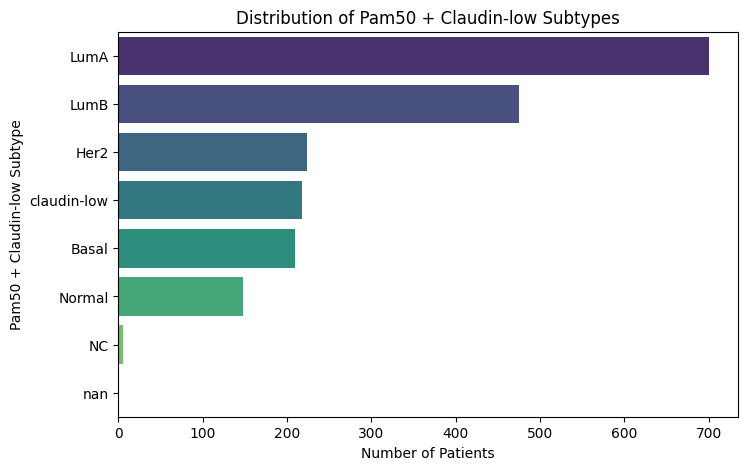

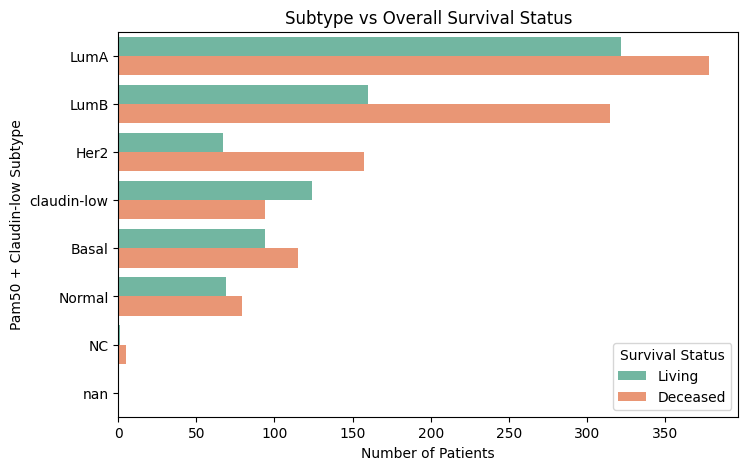

In [30]:
#Cohort: The group or study cohort to which the patient belongs.
# Display first few entries for Pam50 + Claudin-low subtype
print("Sample Subtype values:")
print(df['Pam50 + Claudin-low subtype'].head())

# Count occurrences of each subtype
subtype_counts = df['Pam50 + Claudin-low subtype'].value_counts(dropna=False)
print("\nSubtype Counts:")
print(subtype_counts)

# Plot distribution of subtypes
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    y='Pam50 + Claudin-low subtype',
    order=subtype_counts.index,
    palette='viridis'
)
plt.xlabel('Number of Patients')
plt.ylabel('Pam50 + Claudin-low Subtype')
plt.title('Distribution of Pam50 + Claudin-low Subtypes')
plt.show()

# Optional: Compare subtype vs survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df,
        y='Pam50 + Claudin-low subtype',
        hue='Overall Survival Status',
        order=subtype_counts.index,
        palette='Set2'
    )
    plt.xlabel('Number of Patients')
    plt.ylabel('Pam50 + Claudin-low Subtype')
    plt.title('Subtype vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample ER Status (IHC) values:
0    Positve
1    Positve
2    Positve
3    Positve
4    Positve
Name: ER status measured by IHC, dtype: object

ER Status Counts:
ER status measured by IHC
Positve     1499
Negative     439
NaN           43
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\1428115837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


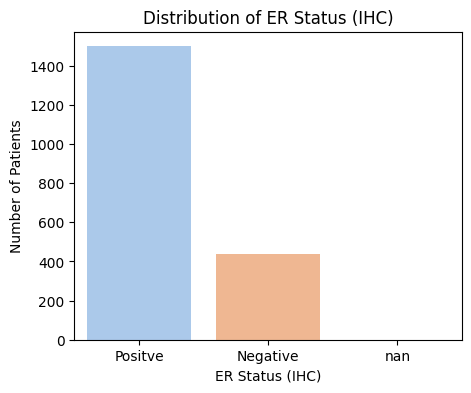

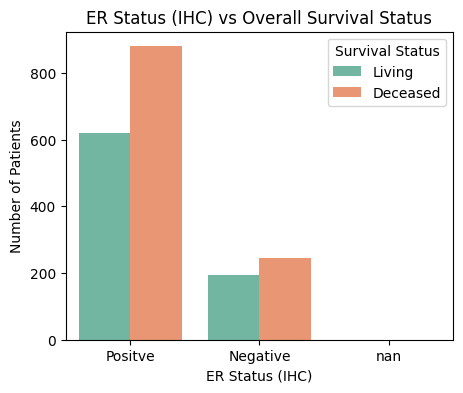

In [31]:
#ER status measured by IHC: Estrogen receptor status as measured by Immunohistochemistry (IHC) (e.g., positive or negative).
# Display sample values
print("Sample ER Status (IHC) values:")
print(df['ER status measured by IHC'].head())

# Count ER status categories
er_counts = df['ER status measured by IHC'].value_counts(dropna=False)
print("\nER Status Counts:")
print(er_counts)

# Plot distribution of ER status
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='ER status measured by IHC',
    order=er_counts.index,
    palette='pastel'
)
plt.xlabel('ER Status (IHC)')
plt.ylabel('Number of Patients')
plt.title('Distribution of ER Status (IHC)')
plt.show()

# Optional: Compare ER status with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='ER status measured by IHC',
        hue='Overall Survival Status',
        order=er_counts.index,
        palette='Set2'
    )
    plt.xlabel('ER Status (IHC)')
    plt.ylabel('Number of Patients')
    plt.title('ER Status (IHC) vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample ER Status values:
0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: ER Status, dtype: object

ER Status Counts:
ER Status
Positive    1507
Negative     474
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\3528809616.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


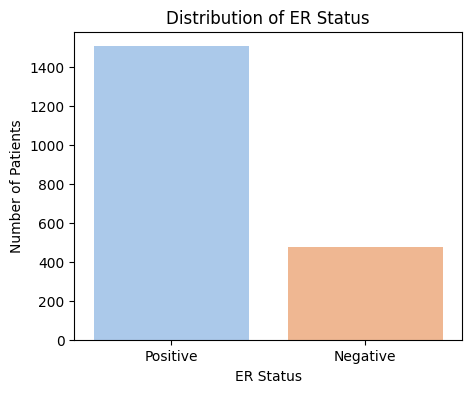

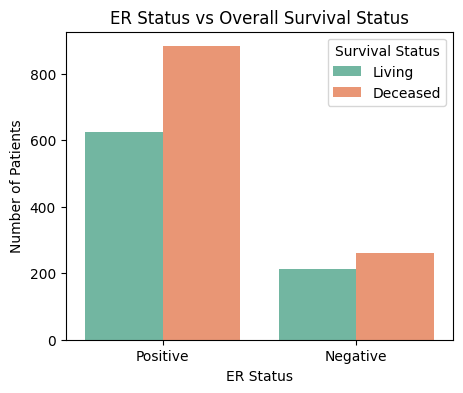

In [32]:
#ER Status: Estrogen receptor status (e.g., positive, negative).
# Display first few entries for ER Status
print("Sample ER Status values:")
print(df['ER Status'].head())

# Count occurrences of each ER Status category
er_status_counts = df['ER Status'].value_counts(dropna=False)
print("\nER Status Counts:")
print(er_status_counts)

# Plot distribution of ER Status
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='ER Status',
    order=er_status_counts.index,
    palette='pastel'
)
plt.xlabel('ER Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of ER Status')
plt.show()

# Optional: Compare ER Status with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='ER Status',
        hue='Overall Survival Status',
        order=er_status_counts.index,
        palette='Set2'
    )
    plt.xlabel('ER Status')
    plt.ylabel('Number of Patients')
    plt.title('ER Status vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Neoplasm Histologic Grade values:
0    3.0
1    3.0
2    2.0
3    2.0
4    3.0
Name: Neoplasm Histologic Grade, dtype: float64

Histologic Grade Counts:
Neoplasm Histologic Grade
3.0    953
2.0    771
1.0    169
NaN     88
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\932733681.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


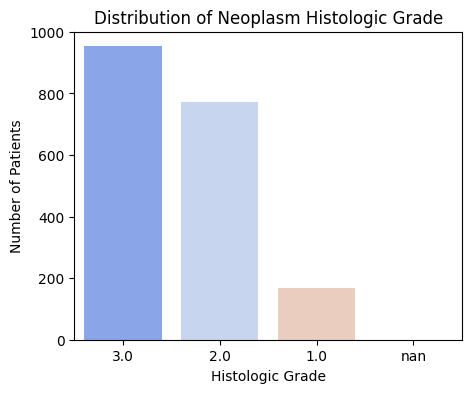

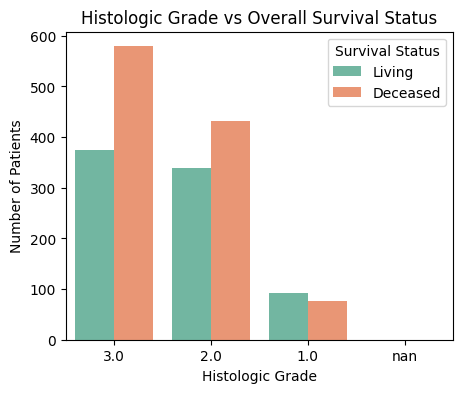

In [33]:
#Neoplasm Histologic Grade: Histologic grade of the neoplasm, indicating how much the tumor cells differ from normal cells.
# Display sample values for histologic grade
print("Sample Neoplasm Histologic Grade values:")
print(df['Neoplasm Histologic Grade'].head())

# Count occurrences of each histologic grade
grade_counts = df['Neoplasm Histologic Grade'].value_counts(dropna=False)
print("\nHistologic Grade Counts:")
print(grade_counts)

# Plot distribution of histologic grades
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Neoplasm Histologic Grade',
    order=grade_counts.index,
    palette='coolwarm'
)
plt.xlabel('Histologic Grade')
plt.ylabel('Number of Patients')
plt.title('Distribution of Neoplasm Histologic Grade')
plt.show()

# Optional: Compare histologic grade with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='Neoplasm Histologic Grade',
        hue='Overall Survival Status',
        order=grade_counts.index,
        palette='Set2'
    )
    plt.xlabel('Histologic Grade')
    plt.ylabel('Number of Patients')
    plt.title('Histologic Grade vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample HER2 Status (SNP6) values:
0    Neutral
1    Neutral
2    Neutral
3    Neutral
4    Neutral
Name: HER2 status measured by SNP6, dtype: object

HER2 Status (SNP6) Counts:
HER2 status measured by SNP6
Neutral    1436
Gain        438
Loss        101
Undef         5
NaN           1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\1375660009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


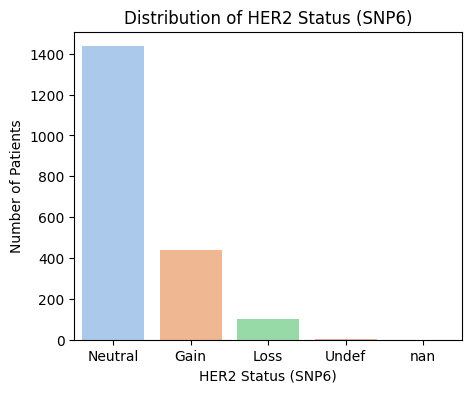

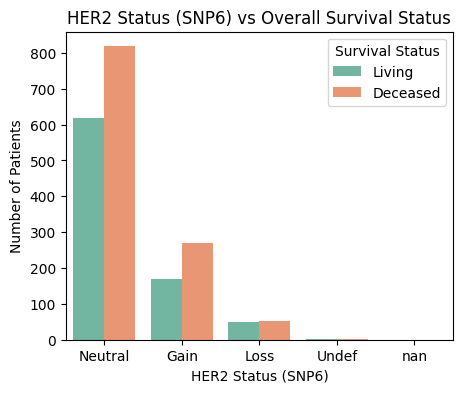

In [34]:
#HER2 status measured by SNP6: HER2 (human epidermal growth factor receptor 2) status measured by SNP (single nucleotide polymorphism) analysis
# Display sample values
print("Sample HER2 Status (SNP6) values:")
print(df['HER2 status measured by SNP6'].head())

# Count HER2 status categories
her2_counts = df['HER2 status measured by SNP6'].value_counts(dropna=False)
print("\nHER2 Status (SNP6) Counts:")
print(her2_counts)

# Plot distribution of HER2 status
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='HER2 status measured by SNP6',
    order=her2_counts.index,
    palette='pastel'
)
plt.xlabel('HER2 Status (SNP6)')
plt.ylabel('Number of Patients')
plt.title('Distribution of HER2 Status (SNP6)')
plt.show()

# Optional: Compare HER2 status with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='HER2 status measured by SNP6',
        hue='Overall Survival Status',
        order=her2_counts.index,
        palette='Set2'
    )
    plt.xlabel('HER2 Status (SNP6)')
    plt.ylabel('Number of Patients')
    plt.title('HER2 Status (SNP6) vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample HER2 Status values:
0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: HER2 Status, dtype: object

HER2 Status Counts:
HER2 Status
Negative    1733
Positive     247
NaN            1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\1326048936.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


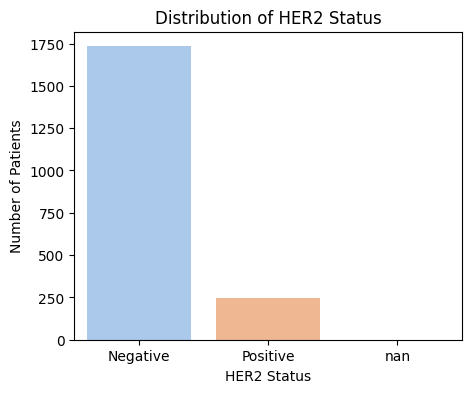

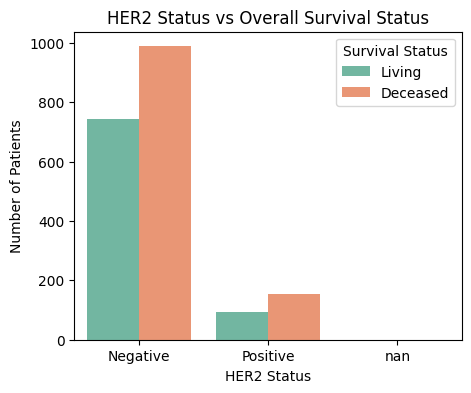

In [35]:
#HER2 Status: HER2 receptor status (e.g., positive, negative).
# Display first few entries for HER2 Status
print("Sample HER2 Status values:")
print(df['HER2 Status'].head())

# Count HER2 status categories
her2_status_counts = df['HER2 Status'].value_counts(dropna=False)
print("\nHER2 Status Counts:")
print(her2_status_counts)

# Plot distribution of HER2 Status
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='HER2 Status',
    order=her2_status_counts.index,
    palette='pastel'
)
plt.xlabel('HER2 Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of HER2 Status')
plt.show()

# Optional: Compare HER2 Status with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='HER2 Status',
        hue='Overall Survival Status',
        order=her2_status_counts.index,
        palette='Set2'
    )
    plt.xlabel('HER2 Status')
    plt.ylabel('Number of Patients')
    plt.title('HER2 Status vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Tumor Other Histologic Subtype values:
0    Ductal/NST
1    Ductal/NST
2    Ductal/NST
3         Mixed
4         Mixed
Name: Tumor Other Histologic Subtype, dtype: object

Tumor Other Histologic Subtype Counts:
Tumor Other Histologic Subtype
Ductal/NST             1492
Mixed                   211
Lobular                 146
NaN                      44
Medullary                25
Mucinous                 23
Tubular/ cribriform      21
Other                    17
Metaplastic               2
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\3023075463.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


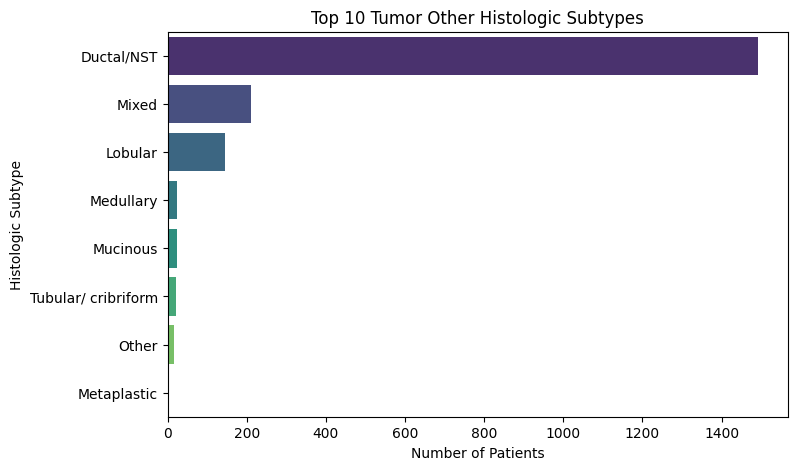

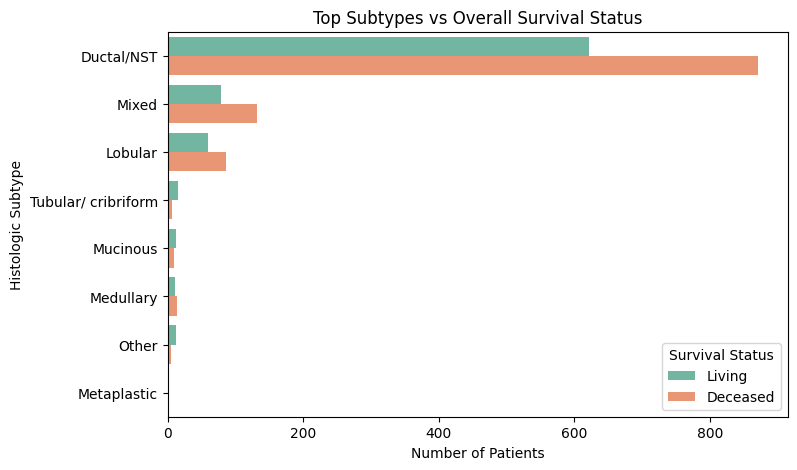

In [36]:
#Tumor Other Histologic Subtype: Other histologic subtypes of the tumor not covered by main classifications.
# Display sample values for Tumor Other Histologic Subtype
print("Sample Tumor Other Histologic Subtype values:")
print(df['Tumor Other Histologic Subtype'].head())

# Count occurrences of each subtype
subtype_counts = df['Tumor Other Histologic Subtype'].value_counts(dropna=False)
print("\nTumor Other Histologic Subtype Counts:")
print(subtype_counts)

# Plot distribution of top 10 subtypes
top_subtypes = subtype_counts.head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_subtypes.values,
    y=top_subtypes.index,
    palette='viridis'
)
plt.xlabel('Number of Patients')
plt.ylabel('Histologic Subtype')
plt.title('Top 10 Tumor Other Histologic Subtypes')
plt.show()

# Optional: Compare subtypes with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(8,5))
    top_subtypes_list = top_subtypes.index
    sns.countplot(
        data=df[df['Tumor Other Histologic Subtype'].isin(top_subtypes_list)],
        y='Tumor Other Histologic Subtype',
        hue='Overall Survival Status',
        palette='Set2'
    )
    plt.xlabel('Number of Patients')
    plt.ylabel('Histologic Subtype')
    plt.title('Top Subtypes vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Hormone Therapy values:
0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Hormone Therapy, dtype: object

Hormone Therapy Counts:
Hormone Therapy
Yes    1216
No      764
NaN       1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\325598496.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


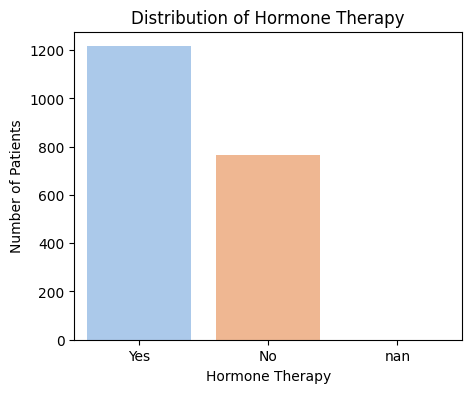

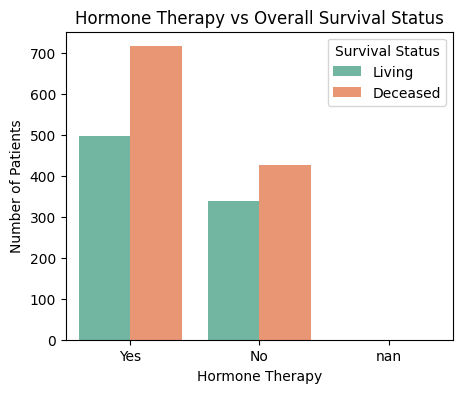

In [37]:
#Hormone Therapy: Indicates whether the patient received hormone therapy (Yes/No).

# Display sample values
print("Sample Hormone Therapy values:")
print(df['Hormone Therapy'].head())

# Count categories (Yes/No or NaN)
ht_counts = df['Hormone Therapy'].value_counts(dropna=False)
print("\nHormone Therapy Counts:")
print(ht_counts)

# Plot distribution
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Hormone Therapy',
    order=ht_counts.index,
    palette='pastel'
)
plt.xlabel('Hormone Therapy')
plt.ylabel('Number of Patients')
plt.title('Distribution of Hormone Therapy')
plt.show()

# Optional: Compare with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='Hormone Therapy',
        hue='Overall Survival Status',
        order=ht_counts.index,
        palette='Set2'
    )
    plt.xlabel('Hormone Therapy')
    plt.ylabel('Number of Patients')
    plt.title('Hormone Therapy vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Inferred Menopausal State values:
0    Post
1     Pre
2     Pre
3     Pre
4    Post
Name: Inferred Menopausal State, dtype: object

Inferred Menopausal State Counts:
Inferred Menopausal State
Post    1556
Pre      424
NaN        1
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21140\817235656.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


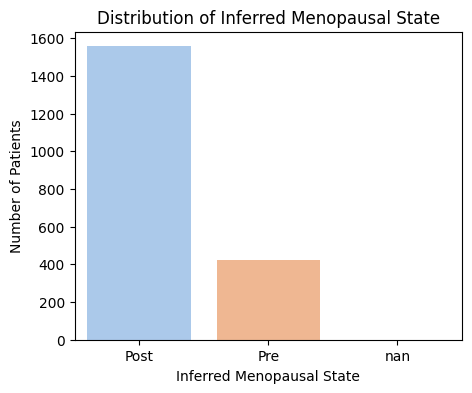

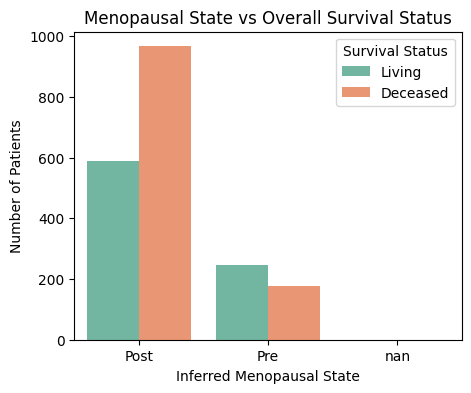

In [38]:
#Inferred Menopausal State: Menopausal state inferred based on age and clinical criteria (e.g., premenopausal, postmenopausal).
# Display sample values for Inferred Menopausal State
print("Sample Inferred Menopausal State values:")
print(df['Inferred Menopausal State'].head())

# Count categories (e.g., premenopausal, postmenopausal, NaN)
meno_counts = df['Inferred Menopausal State'].value_counts(dropna=False)
print("\nInferred Menopausal State Counts:")
print(meno_counts)

# Plot distribution
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Inferred Menopausal State',
    order=meno_counts.index,
    palette='pastel'
)
plt.xlabel('Inferred Menopausal State')
plt.ylabel('Number of Patients')
plt.title('Distribution of Inferred Menopausal State')
plt.show()

# Optional: Compare with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='Inferred Menopausal State',
        hue='Overall Survival Status',
        order=meno_counts.index,
        palette='Set2'
    )
    plt.xlabel('Inferred Menopausal State')
    plt.ylabel('Number of Patients')
    plt.title('Menopausal State vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Integrative Cluster values:
0    4ER+
1    4ER+
2       3
3       9
4       9
Name: Integrative Cluster, dtype: object

Integrative Cluster Counts:
Integrative Cluster
NaN     529
8       299
3       290
4ER+    260
10      226
7       190
5       190
9       146
1       139
6        85
4ER-     83
2        72
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\1017010388.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


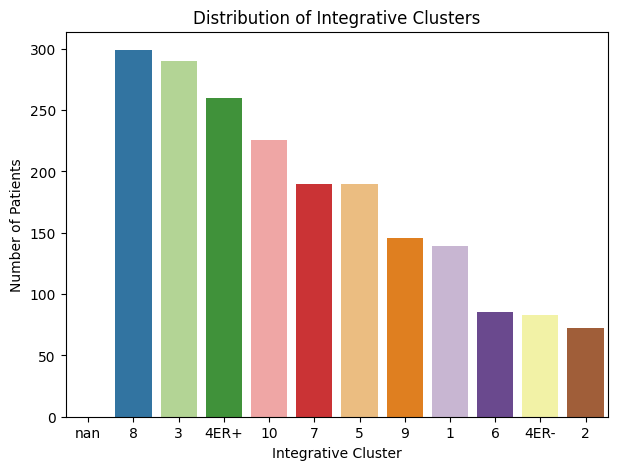

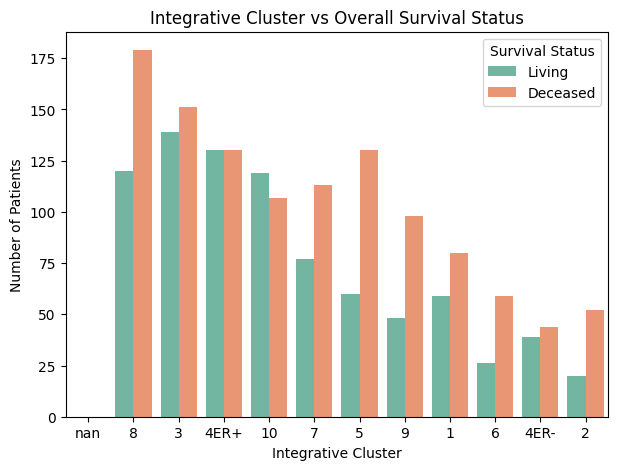

In [6]:
#Integrative Cluster: Classification based on integrative clustering of genomic data.
# Display first few entries
print("Sample Integrative Cluster values:")
print(df['Integrative Cluster'].head())

# Count frequency of each cluster
cluster_counts = df['Integrative Cluster'].value_counts(dropna=False)
print("\nIntegrative Cluster Counts:")
print(cluster_counts)

# Plot distribution of Integrative Clusters
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='Integrative Cluster',
    order=cluster_counts.index,
    palette='Paired'
)
plt.xlabel('Integrative Cluster')
plt.ylabel('Number of Patients')
plt.title('Distribution of Integrative Clusters')
plt.show()

# Optional: Compare with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(
        data=df,
        x='Integrative Cluster',
        hue='Overall Survival Status',
        order=cluster_counts.index,
        palette='Set2'
    )
    plt.xlabel('Integrative Cluster')
    plt.ylabel('Number of Patients')
    plt.title('Integrative Cluster vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Primary Tumor Laterality values:
0    Right
1    Right
2    Right
3    Right
4    Right
Name: Primary Tumor Laterality, dtype: object

Primary Tumor Laterality Counts:
Primary Tumor Laterality
Left     973
Right    897
NaN      639
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\2779460919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


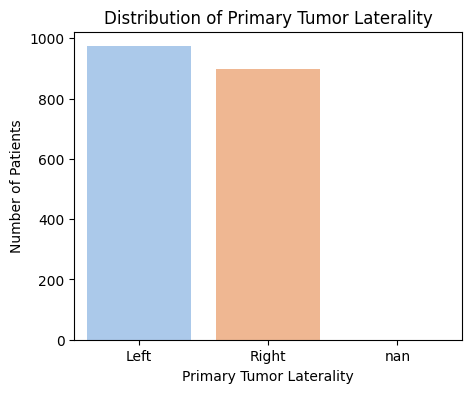

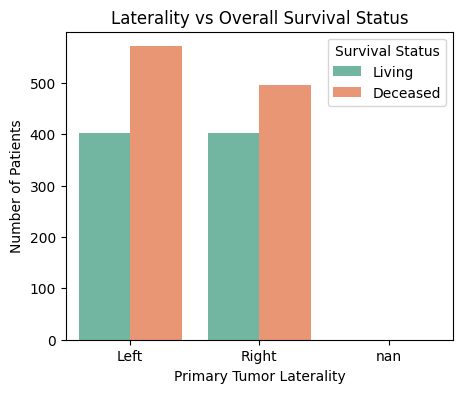

In [7]:
#Primary Tumor Laterality: The side of the body where the primary tumor is located (left or right).
# Display sample values
print("Sample Primary Tumor Laterality values:")
print(df['Primary Tumor Laterality'].head())

# Count left vs right (and missing)
laterality_counts = df['Primary Tumor Laterality'].value_counts(dropna=False)
print("\nPrimary Tumor Laterality Counts:")
print(laterality_counts)

# Plot distribution
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Primary Tumor Laterality',
    order=laterality_counts.index,
    palette='pastel'
)
plt.xlabel('Primary Tumor Laterality')
plt.ylabel('Number of Patients')
plt.title('Distribution of Primary Tumor Laterality')
plt.show()

# Optional: Compare laterality with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='Primary Tumor Laterality',
        hue='Overall Survival Status',
        order=laterality_counts.index,
        palette='Set2'
    )
    plt.xlabel('Primary Tumor Laterality')
    plt.ylabel('Number of Patients')
    plt.title('Laterality vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Lymph Nodes Examined Positive values:
0    10.0
1     0.0
2     1.0
3     3.0
4     8.0
Name: Lymph nodes examined positive, dtype: float64

Statistics for Lymph Nodes Examined Positive:
count    2243.000000
mean        1.950513
std         4.017774
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        45.000000
Name: Lymph nodes examined positive, dtype: float64


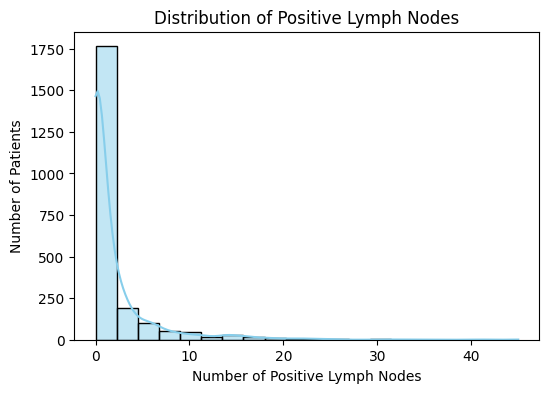

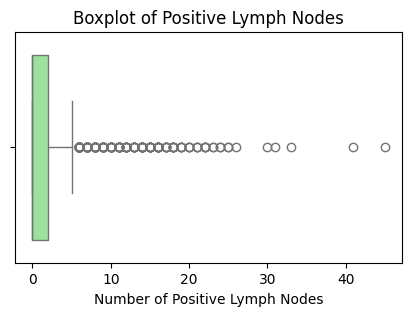

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\3902069464.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


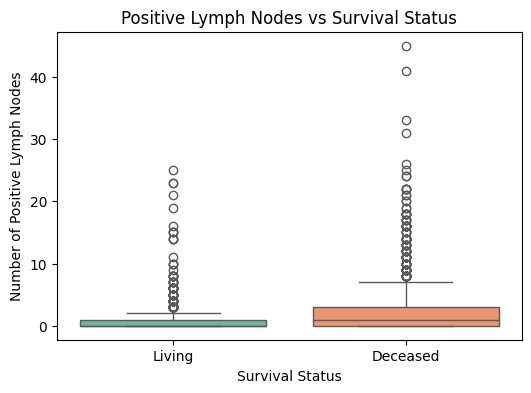

In [8]:
#Lymph nodes examined positive: Number of lymph nodes that tested positive for cancer.
# Display first few entries
print("Sample Lymph Nodes Examined Positive values:")
print(df['Lymph nodes examined positive'].head())

# Check basic statistics
print("\nStatistics for Lymph Nodes Examined Positive:")
print(df['Lymph nodes examined positive'].describe())

# Plot distribution (histogram)
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='Lymph nodes examined positive',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.xlabel('Number of Positive Lymph Nodes')
plt.ylabel('Number of Patients')
plt.title('Distribution of Positive Lymph Nodes')
plt.show()

# Optional: Boxplot to detect outliers
plt.figure(figsize=(5,3))
sns.boxplot(
    data=df,
    x='Lymph nodes examined positive',
    color='lightgreen'
)
plt.xlabel('Number of Positive Lymph Nodes')
plt.title('Boxplot of Positive Lymph Nodes')
plt.show()

# Optional: Compare positive lymph nodes count with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Lymph nodes examined positive',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Number of Positive Lymph Nodes')
    plt.title('Positive Lymph Nodes vs Survival Status')
    plt.show()

Sample Mutation Count values:
0    NaN
1    2.0
2    2.0
3    1.0
4    2.0
Name: Mutation Count, dtype: float64

Statistics for Mutation Count:
count    2357.000000
mean        5.578702
std         3.967967
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        80.000000
Name: Mutation Count, dtype: float64


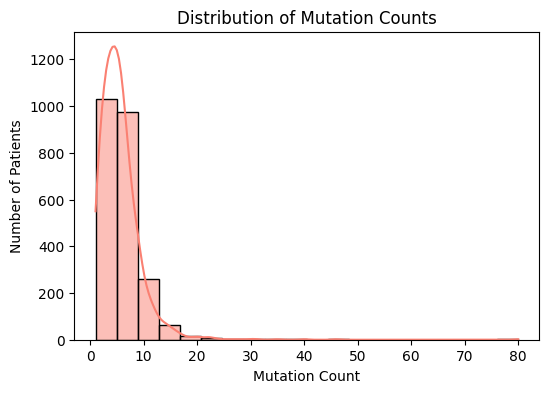

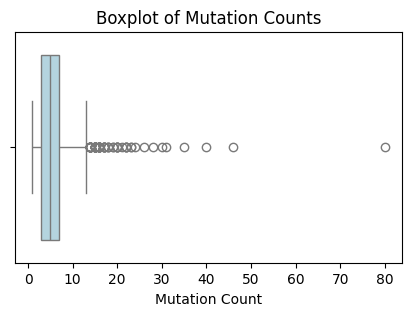

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\48454393.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


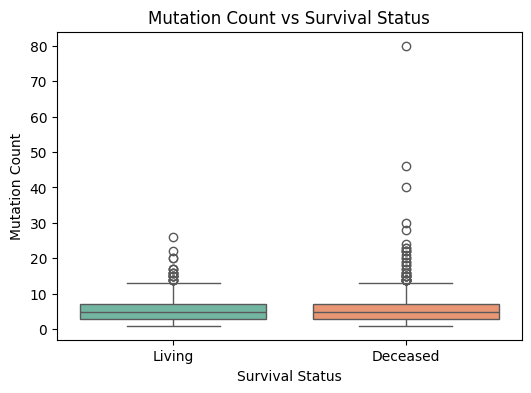

In [9]:
#Mutation Count: Total number of genetic mutations identified in the tumor.
# Display first few entries
print("Sample Mutation Count values:")
print(df['Mutation Count'].head())

# Summary statistics
print("\nStatistics for Mutation Count:")
print(df['Mutation Count'].describe())

# Plot distribution (histogram)
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='Mutation Count',
    bins=20,
    kde=True,
    color='salmon'
)
plt.xlabel('Mutation Count')
plt.ylabel('Number of Patients')
plt.title('Distribution of Mutation Counts')
plt.show()

# Optional: Boxplot to detect outliers
plt.figure(figsize=(5,3))
sns.boxplot(
    data=df,
    x='Mutation Count',
    color='lightblue'
)
plt.xlabel('Mutation Count')
plt.title('Boxplot of Mutation Counts')
plt.show()

# Optional: Compare mutation count with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Mutation Count',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Mutation Count')
    plt.title('Mutation Count vs Survival Status')
    plt.show()

Sample Nottingham Prognostic Index values:
0    6.044
1    4.020
2    4.030
3    4.050
4    6.080
Name: Nottingham prognostic index, dtype: float64

Statistics for Nottingham Prognostic Index:
count    2287.000000
mean        4.028787
std         1.189092
min         1.000000
25%         3.048000
50%         4.044000
75%         5.040000
max         7.200000
Name: Nottingham prognostic index, dtype: float64


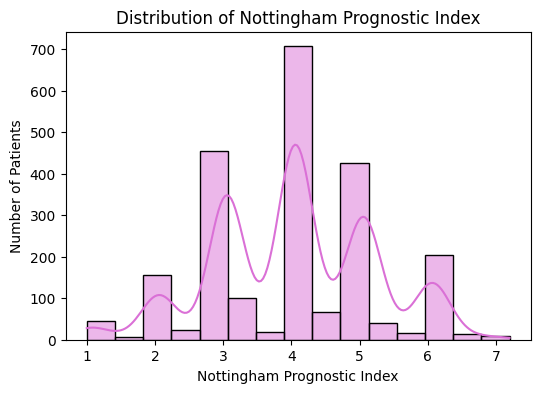

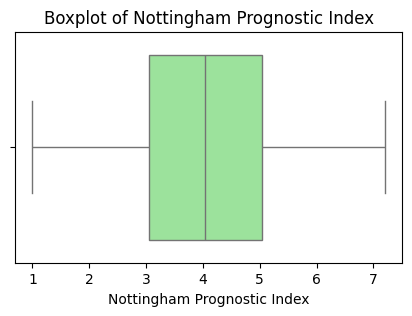

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\2450872239.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


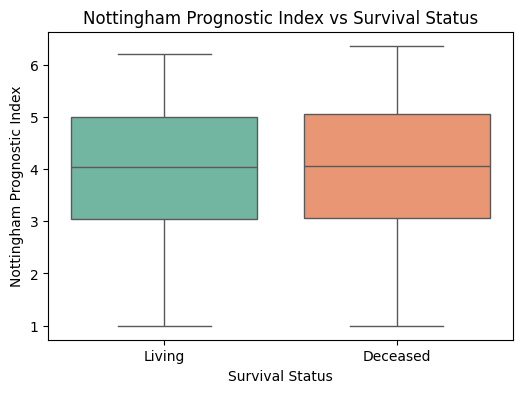

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\2450872239.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(



Risk Category Counts:
NPI Risk Category
Moderate Risk    1266
Low Risk          769
High Risk         474
Name: count, dtype: int64


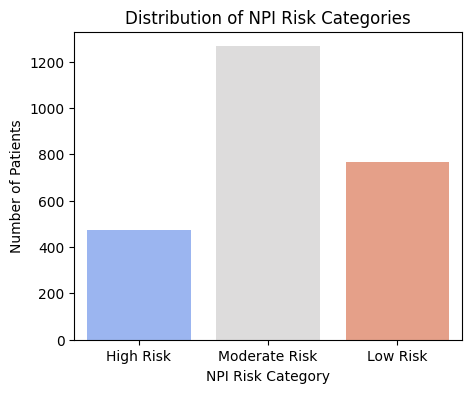

In [10]:
#Nottingham prognostic index: Prognostic score based on tumor size, lymph node status, and histologic grade.
# Display first few entries
print("Sample Nottingham Prognostic Index values:")
print(df['Nottingham prognostic index'].head())

# Summary statistics
print("\nStatistics for Nottingham Prognostic Index:")
print(df['Nottingham prognostic index'].describe())

# Plot distribution (histogram + KDE)
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='Nottingham prognostic index',
    bins=15,
    kde=True,
    color='orchid'
)
plt.xlabel('Nottingham Prognostic Index')
plt.ylabel('Number of Patients')
plt.title('Distribution of Nottingham Prognostic Index')
plt.show()

# Optional: Boxplot to check for outliers
plt.figure(figsize=(5,3))
sns.boxplot(
    data=df,
    x='Nottingham prognostic index',
    color='lightgreen'
)
plt.xlabel('Nottingham Prognostic Index')
plt.title('Boxplot of Nottingham Prognostic Index')
plt.show()

# Optional: Compare NPI with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Nottingham prognostic index',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Nottingham Prognostic Index')
    plt.title('Nottingham Prognostic Index vs Survival Status')
    plt.show()

# Optional: Categorize NPI into clinical risk groups
def categorize_npi(npi):
    if npi < 3.4:
        return 'Low Risk'
    elif 3.4 <= npi <= 5.4:
        return 'Moderate Risk'
    else:
        return 'High Risk'

if df['Nottingham prognostic index'].notnull().any():
    df['NPI Risk Category'] = df['Nottingham prognostic index'].apply(categorize_npi)
    print("\nRisk Category Counts:")
    print(df['NPI Risk Category'].value_counts())

    plt.figure(figsize=(5,4))
    sns.countplot(
        data=df,
        x='NPI Risk Category',
        palette='coolwarm'
    )
    plt.xlabel('NPI Risk Category')
    plt.ylabel('Number of Patients')
    plt.title('Distribution of NPI Risk Categories')
    plt.show()

Sample Oncotree Code values:
0     IDC
1     IDC
2     IDC
3    MDLC
4    MDLC
Name: Oncotree Code, dtype: object

Oncotree Code Counts:
Oncotree Code
IDC       1865
MDLC       269
ILC        192
BRCA       133
IMMC        25
BREAST      21
PBS          2
MBC          2
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\2934519339.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


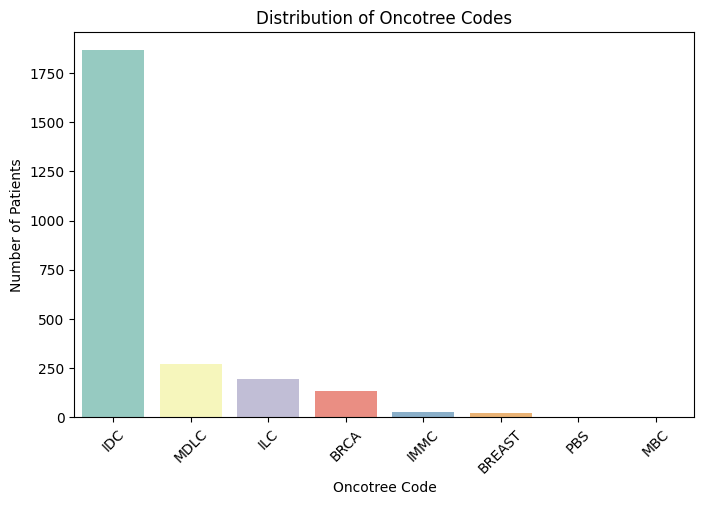

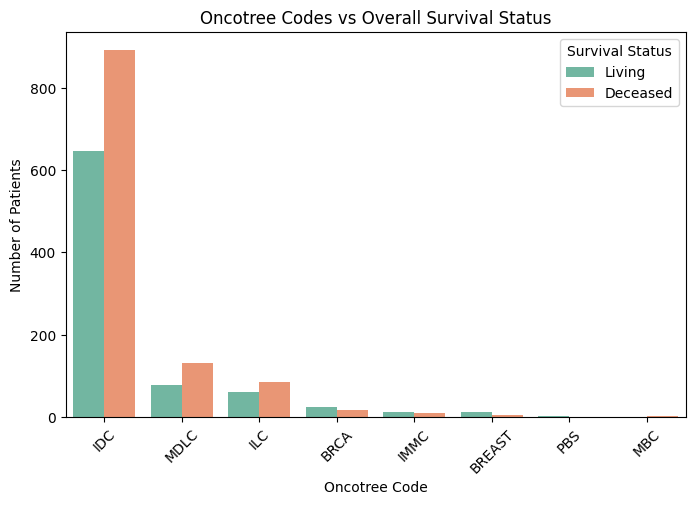

In [11]:
#Oncotree Code: A code that represents the type of cancer based on the OncoTree classification.
# Display sample Oncotree Code values
print("Sample Oncotree Code values:")
print(df['Oncotree Code'].head())

# Count frequency of each Oncotree Code
oncotree_counts = df['Oncotree Code'].value_counts(dropna=False)
print("\nOncotree Code Counts:")
print(oncotree_counts)

# Bar chart of Oncotree Codes
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Oncotree Code',
    order=oncotree_counts.index,
    palette='Set3'
)
plt.xlabel('Oncotree Code')
plt.ylabel('Number of Patients')
plt.title('Distribution of Oncotree Codes')
plt.xticks(rotation=45)
plt.show()

# Optional: Compare Oncotree Codes with survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df,
        x='Oncotree Code',
        hue='Overall Survival Status',
        order=oncotree_counts.index,
        palette='Set2'
    )
    plt.xlabel('Oncotree Code')
    plt.ylabel('Number of Patients')
    plt.title('Oncotree Codes vs Overall Survival Status')
    plt.xticks(rotation=45)
    plt.legend(title='Survival Status')
    plt.show()

Sample Overall Survival (Months) values:
0    140.500000
1     84.633333
2    163.700000
3    164.933333
4     41.366667
Name: Overall Survival (Months), dtype: float64

Statistics for Overall Survival (Months):
count    1981.000000
mean      125.244271
std        76.111772
min         0.000000
25%        60.866667
50%       116.466667
75%       185.133333
max       355.200000
Name: Overall Survival (Months), dtype: float64


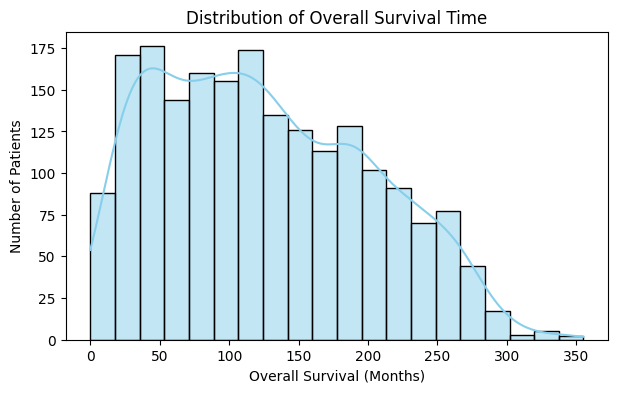

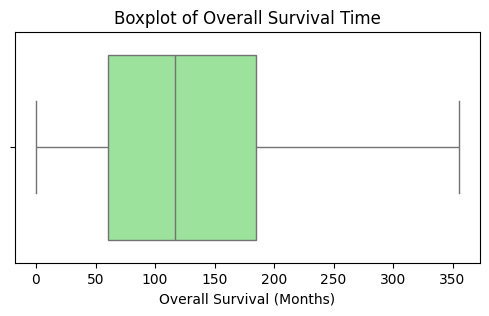

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\562157421.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


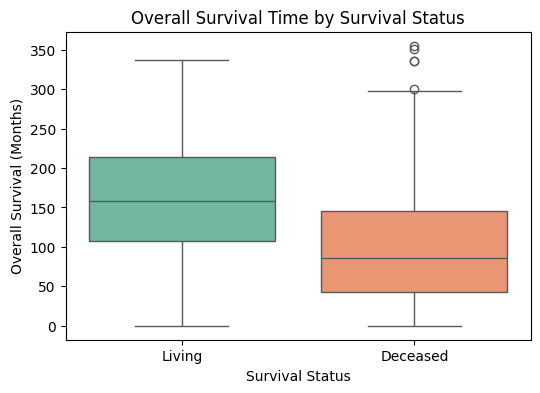

In [12]:
#Overall Survival (Months): The overall survival time of the patient in months.
# Preview survival months
print("Sample Overall Survival (Months) values:")
print(df['Overall Survival (Months)'].head())

# Summary statistics
print("\nStatistics for Overall Survival (Months):")
print(df['Overall Survival (Months)'].describe())

# Histogram for survival distribution
plt.figure(figsize=(7,4))
sns.histplot(
    data=df,
    x='Overall Survival (Months)',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Overall Survival Time')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(6,3))
sns.boxplot(
    data=df,
    x='Overall Survival (Months)',
    color='lightgreen'
)
plt.xlabel('Overall Survival (Months)')
plt.title('Boxplot of Overall Survival Time')
plt.show()

# Optional: Compare survival months by survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Overall Survival (Months)',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Overall Survival (Months)')
    plt.title('Overall Survival Time by Survival Status')
    plt.show()

Sample Overall Survival Status values:
0      Living
1      Living
2    Deceased
3      Living
4    Deceased
Name: Overall Survival Status, dtype: object

Overall Survival Status Counts:
Overall Survival Status
Deceased    1144
Living       837
NaN          528
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\1558384009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


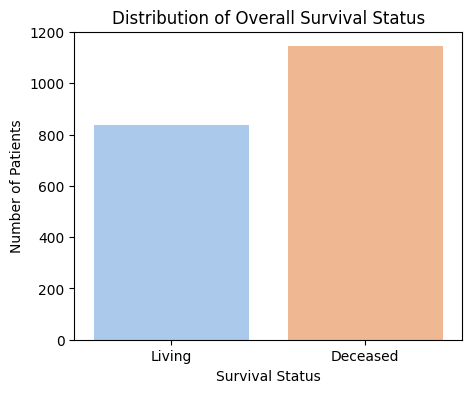

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\1558384009.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


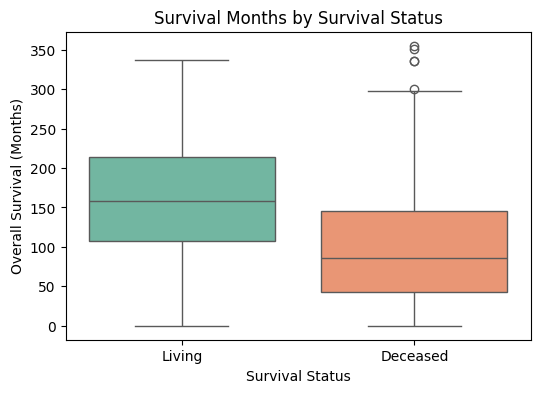

In [14]:
#Overall Survival Status: Indicates whether the patient is alive or deceased.
# Preview the column
print("Sample Overall Survival Status values:")
print(df['Overall Survival Status'].head())

# Count the occurrences of each status
status_counts = df['Overall Survival Status'].value_counts(dropna=False)
print("\nOverall Survival Status Counts:")
print(status_counts)

# Bar plot of survival status
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Overall Survival Status',
    palette='pastel'
)
plt.xlabel('Survival Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of Overall Survival Status')
plt.show()

# Optional: Compare survival status with average survival months
if 'Overall Survival (Months)' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Overall Survival (Months)',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Overall Survival (Months)')
    plt.title('Survival Months by Survival Status')
    plt.show()

Sample PR Status values:
0    Negative
1    Positive
2    Positive
3    Positive
4    Positive
Name: PR Status, dtype: object

PR Status Counts:
PR Status
Positive    1040
Negative     940
NaN          529
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\2112513895.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


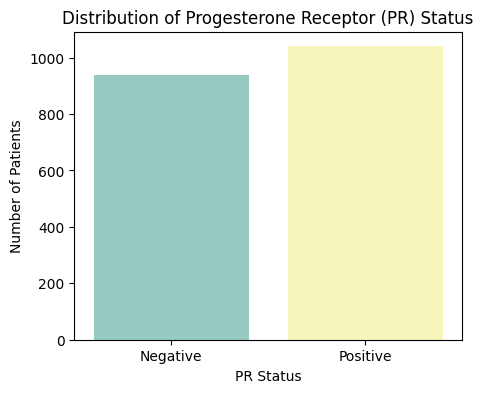

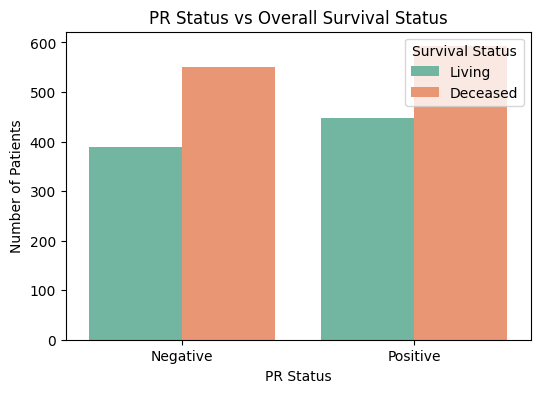

In [15]:
#PR Status: Progesterone receptor status (e.g., positive, negative).

# Preview PR Status values
print("Sample PR Status values:")
print(df['PR Status'].head())

# Count occurrences of each status
pr_counts = df['PR Status'].value_counts(dropna=False)
print("\nPR Status Counts:")
print(pr_counts)

# Bar chart for PR Status distribution
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='PR Status',
    palette='Set3'
)
plt.xlabel('PR Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of Progesterone Receptor (PR) Status')
plt.show()

# Optional: Compare PR Status with survival outcome
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x='PR Status',
        hue='Overall Survival Status',
        palette='Set2'
    )
    plt.xlabel('PR Status')
    plt.ylabel('Number of Patients')
    plt.title('PR Status vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Radio Therapy values:
0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: Radio Therapy, dtype: object

Radio Therapy Counts:
Radio Therapy
Yes    1173
No      807
NaN     529
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\3987648275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


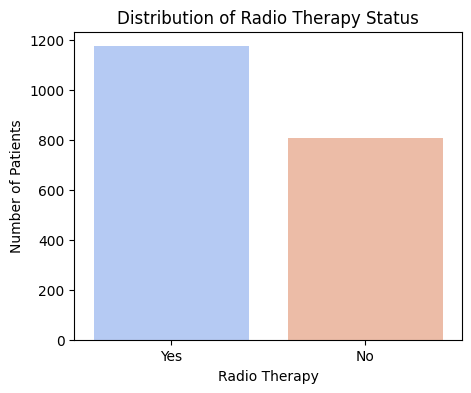

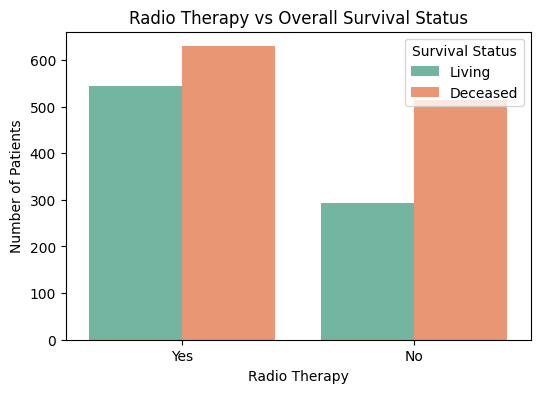

In [16]:
#Radio Therapy: Indicates whether the patient received radiotherapy (Yes/No).
# Preview Radio Therapy values
print("Sample Radio Therapy values:")
print(df['Radio Therapy'].head())

# Count occurrences
rt_counts = df['Radio Therapy'].value_counts(dropna=False)
print("\nRadio Therapy Counts:")
print(rt_counts)

# Bar chart for Radio Therapy distribution
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Radio Therapy',
    palette='coolwarm'
)
plt.xlabel('Radio Therapy')
plt.ylabel('Number of Patients')
plt.title('Distribution of Radio Therapy Status')
plt.show()

# Optional: Compare Radio Therapy with survival outcome
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x='Radio Therapy',
        hue='Overall Survival Status',
        palette='Set2'
    )
    plt.xlabel('Radio Therapy')
    plt.ylabel('Number of Patients')
    plt.title('Radio Therapy vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Relapse Free Status (Months) values:
0    138.65
1     83.52
2    151.28
3    162.76
4     18.55
Name: Relapse Free Status (Months), dtype: float64

Statistics for Relapse Free Status (Months):
count    2388.000000
mean      108.842487
std        76.519494
min         0.000000
25%        40.560000
50%        99.095000
75%       167.640000
max       384.210000
Name: Relapse Free Status (Months), dtype: float64


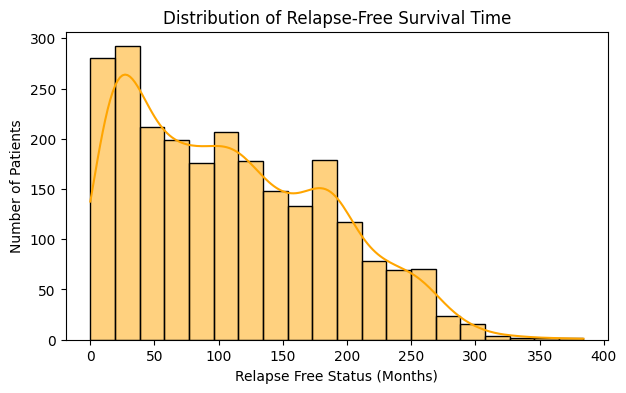

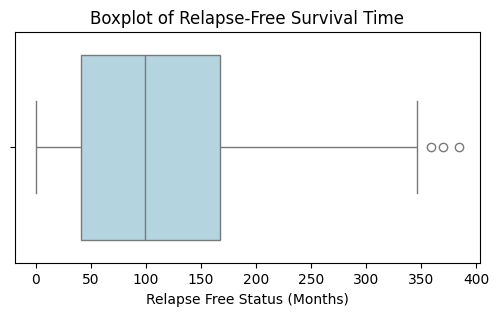

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\2929630893.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


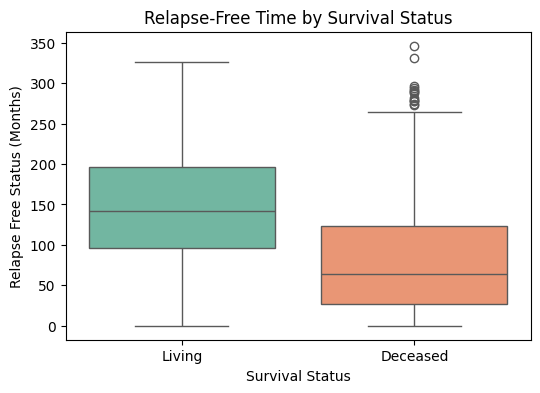

In [17]:
#Relapse Free Status (Months): Time in months the patient remained free from cancer relapse.
# Preview relapse-free months
print("Sample Relapse Free Status (Months) values:")
print(df['Relapse Free Status (Months)'].head())

# Summary statistics
print("\nStatistics for Relapse Free Status (Months):")
print(df['Relapse Free Status (Months)'].describe())

# Histogram for relapse-free time distribution
plt.figure(figsize=(7,4))
sns.histplot(
    data=df,
    x='Relapse Free Status (Months)',
    bins=20,
    kde=True,
    color='orange'
)
plt.xlabel('Relapse Free Status (Months)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Relapse-Free Survival Time')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(6,3))
sns.boxplot(
    data=df,
    x='Relapse Free Status (Months)',
    color='lightblue'
)
plt.xlabel('Relapse Free Status (Months)')
plt.title('Boxplot of Relapse-Free Survival Time')
plt.show()

# Optional: Compare relapse-free time by survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Relapse Free Status (Months)',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Relapse Free Status (Months)')
    plt.title('Relapse-Free Time by Survival Status')
    plt.show()

Sample Relapse Free Status values:
0    Not Recurred
1    Not Recurred
2        Recurred
3    Not Recurred
4        Recurred
Name: Relapse Free Status, dtype: object

Relapse Free Status Counts:
Relapse Free Status
Not Recurred    1486
Recurred        1002
NaN               21
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\4047283466.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


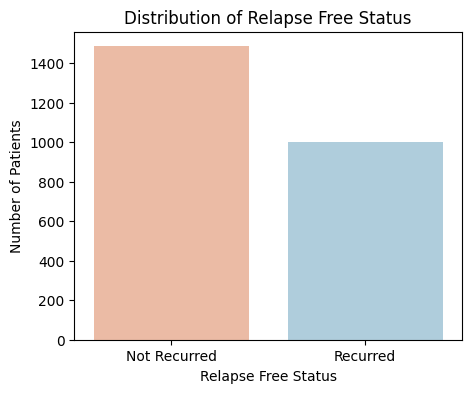

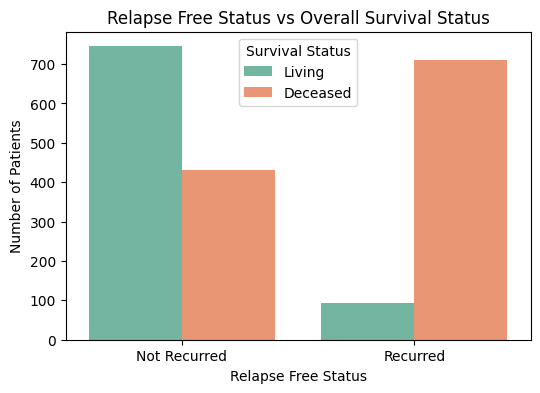

In [18]:
#Relapse Free Status: Indicates whether the patient has had a relapse of cancer (Yes/No).
# Preview Relapse Free Status values
print("Sample Relapse Free Status values:")
print(df['Relapse Free Status'].head())

# Count Yes/No values
relapse_counts = df['Relapse Free Status'].value_counts(dropna=False)
print("\nRelapse Free Status Counts:")
print(relapse_counts)

# Bar chart for relapse status
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Relapse Free Status',
    palette='RdBu'
)
plt.xlabel('Relapse Free Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of Relapse Free Status')
plt.show()

# Optional: Compare relapse status with survival outcome
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x='Relapse Free Status',
        hue='Overall Survival Status',
        palette='Set2'
    )
    plt.xlabel('Relapse Free Status')
    plt.ylabel('Number of Patients')
    plt.title('Relapse Free Status vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Sex values:
0    Female
1    Female
2    Female
3    Female
4    Female
Name: Sex, dtype: object

Sex distribution counts:
Sex
Female    2509
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\75203424.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


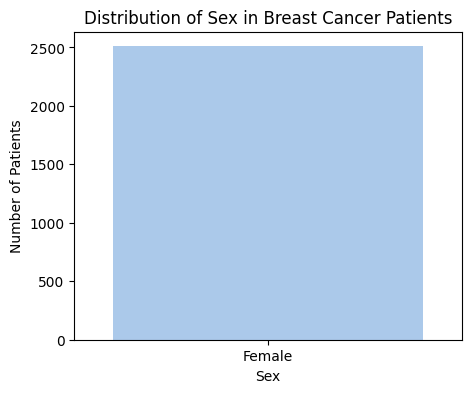

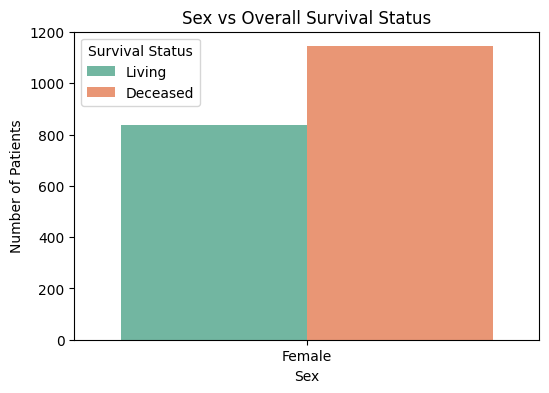

In [19]:
#Sex: The sex of the patient (male or female).
# Preview Sex values
print("Sample Sex values:")
print(df['Sex'].head())

# Count occurrences of each category
sex_counts = df['Sex'].value_counts(dropna=False)
print("\nSex distribution counts:")
print(sex_counts)

# Bar chart for Sex distribution
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='Sex',
    palette='pastel'
)
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.title('Distribution of Sex in Breast Cancer Patients')
plt.show()

# Optional: Compare Sex with survival outcome
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x='Sex',
        hue='Overall Survival Status',
        palette='Set2'
    )
    plt.xlabel('Sex')
    plt.ylabel('Number of Patients')
    plt.title('Sex vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample 3-Gene classifier subtype values:
0                ER-/HER2-
1    ER+/HER2- High Prolif
2                      NaN
3                      NaN
4    ER+/HER2- High Prolif
Name: 3-Gene classifier subtype, dtype: object

3-Gene classifier subtype counts:
3-Gene classifier subtype
NaN                      745
ER+/HER2- Low Prolif     640
ER+/HER2- High Prolif    617
ER-/HER2-                309
HER2+                    198
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\3492656132.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


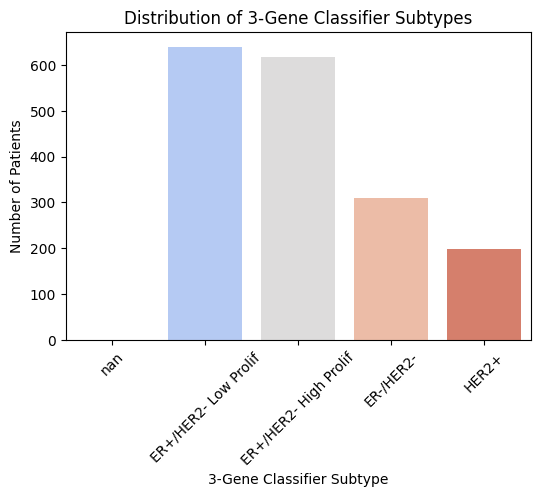

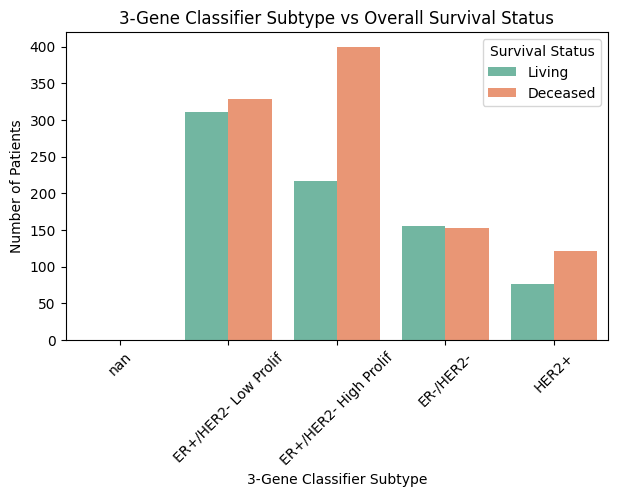

In [20]:
#3-Gene classifier subtype: Subtypes based on the expression of three specific genes.
# Preview column values
print("Sample 3-Gene classifier subtype values:")
print(df['3-Gene classifier subtype'].head())

# Count occurrences of each subtype
gene3_counts = df['3-Gene classifier subtype'].value_counts(dropna=False)
print("\n3-Gene classifier subtype counts:")
print(gene3_counts)

# Bar chart for subtype distribution
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='3-Gene classifier subtype',
    order=gene3_counts.index,  # Ensures order matches counts
    palette='coolwarm'
)
plt.xlabel('3-Gene Classifier Subtype')
plt.ylabel('Number of Patients')
plt.title('Distribution of 3-Gene Classifier Subtypes')
plt.xticks(rotation=45)
plt.show()

# Optional: Compare 3-Gene subtype with survival outcome
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(
        data=df,
        x='3-Gene classifier subtype',
        hue='Overall Survival Status',
        order=gene3_counts.index,
        palette='Set2'
    )
    plt.xlabel('3-Gene Classifier Subtype')
    plt.ylabel('Number of Patients')
    plt.title('3-Gene Classifier Subtype vs Overall Survival Status')
    plt.xticks(rotation=45)
    plt.legend(title='Survival Status')
    plt.show()

Sample Tumor Size values:
0    22.0
1    10.0
2    15.0
3    25.0
4    40.0
Name: Tumor Size, dtype: float64

Statistics for Tumor Size:
count    2360.000000
mean       26.220093
std        15.370883
min         1.000000
25%        17.000000
50%        22.410000
75%        30.000000
max       182.000000
Name: Tumor Size, dtype: float64


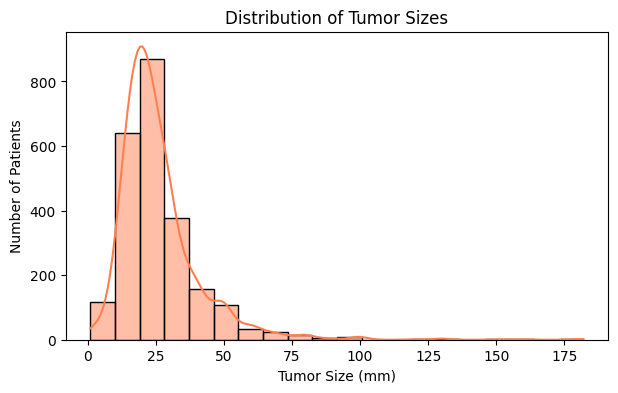

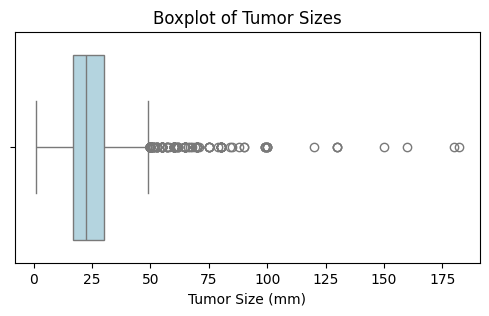

C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\1787114161.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


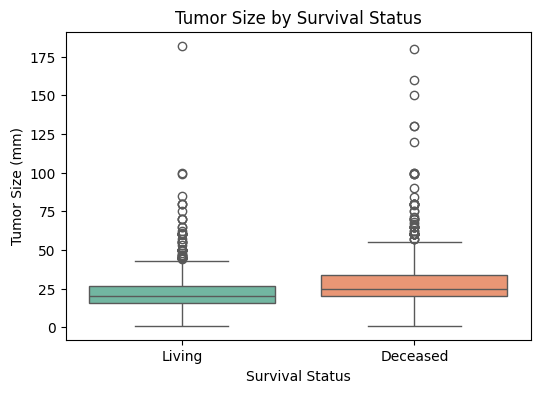

In [21]:
#Tumor Size: Size of the primary tumor.
# Preview tumor size values
print("Sample Tumor Size values:")
print(df['Tumor Size'].head())

# Summary statistics
print("\nStatistics for Tumor Size:")
print(df['Tumor Size'].describe())

# Histogram for tumor size distribution
plt.figure(figsize=(7,4))
sns.histplot(
    data=df,
    x='Tumor Size',
    bins=20,
    kde=True,
    color='coral'
)
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Tumor Sizes')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(6,3))
sns.boxplot(
    data=df,
    x='Tumor Size',
    color='lightblue'
)
plt.xlabel('Tumor Size (mm)')
plt.title('Boxplot of Tumor Sizes')
plt.show()

# Optional: Compare tumor size by survival status
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Overall Survival Status',
        y='Tumor Size',
        palette='Set2'
    )
    plt.xlabel('Survival Status')
    plt.ylabel('Tumor Size (mm)')
    plt.title('Tumor Size by Survival Status')
    plt.show()

Sample Tumor Stage values:
0    2.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: Tumor Stage, dtype: float64

Tumor Stage distribution counts:
Tumor Stage
2.0    979
NaN    721
1.0    630
3.0    144
0.0     24
4.0     11
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\4063993948.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


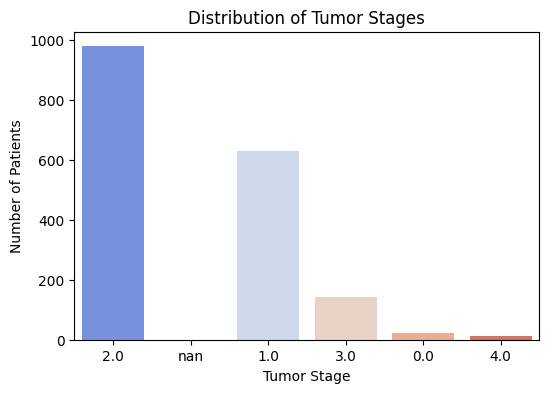

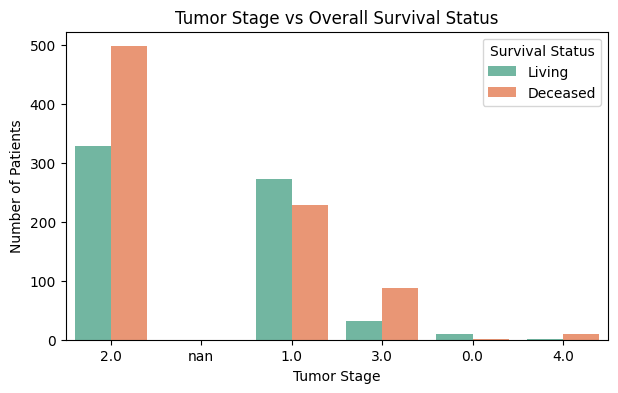

In [22]:
#Tumor Stage: Stage of the tumor, indicating the extent of cancer spread.
# Preview Tumor Stage values
print("Sample Tumor Stage values:")
print(df['Tumor Stage'].head())

# Count occurrences of each stage
stage_counts = df['Tumor Stage'].value_counts(dropna=False)
print("\nTumor Stage distribution counts:")
print(stage_counts)

# Bar chart for tumor stage distribution
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Tumor Stage',
    order=stage_counts.index,  # Ensure order matches counts
    palette='coolwarm'
)
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.title('Distribution of Tumor Stages')
plt.show()

# Optional: Compare Tumor Stage with survival outcome
if 'Overall Survival Status' in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(
        data=df,
        x='Tumor Stage',
        hue='Overall Survival Status',
        order=stage_counts.index,
        palette='Set2'
    )
    plt.xlabel('Tumor Stage')
    plt.ylabel('Number of Patients')
    plt.title('Tumor Stage vs Overall Survival Status')
    plt.legend(title='Survival Status')
    plt.show()

Sample Patient's Vital Status values:
0             Living
1             Living
2    Died of Disease
3             Living
4    Died of Disease
Name: Patient's Vital Status, dtype: object

Patient's Vital Status distribution counts:
Patient's Vital Status
Living                  837
Died of Disease         646
NaN                     529
Died of Other Causes    497
Name: count, dtype: int64


C:\Users\Krittika\AppData\Local\Temp\ipykernel_21500\4230673981.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


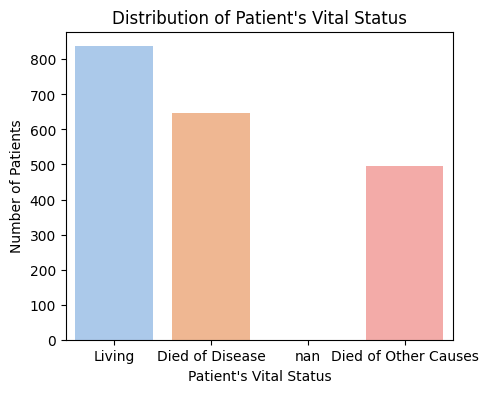

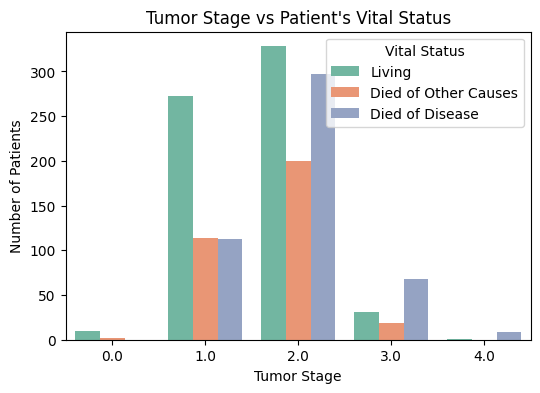

In [23]:
#Patient's Vital Status: Indicates whether the patient is alive or deceased at the last follow-up.
# Preview column values
print("Sample Patient's Vital Status values:")
print(df["Patient's Vital Status"].head())

# Count occurrences
vital_counts = df["Patient's Vital Status"].value_counts(dropna=False)
print("\nPatient's Vital Status distribution counts:")
print(vital_counts)

# Bar chart
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x="Patient's Vital Status",
    palette='pastel',
    order=vital_counts.index
)
plt.xlabel("Patient's Vital Status")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patient's Vital Status")
plt.show()

# Optional: Compare with Tumor Stage
if 'Tumor Stage' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x='Tumor Stage',
        hue="Patient's Vital Status",
        palette='Set2'
    )
    plt.xlabel('Tumor Stage')
    plt.ylabel('Number of Patients')
    plt.title("Tumor Stage vs Patient's Vital Status")
    plt.legend(title="Vital Status")
    plt.show()